In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [71]:
file = r'C:\Users\toloz\Ironhack\Week 5\Monday\archive\amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(file)

# Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

In [5]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [8]:
crosstab_result[True] / (crosstab_result[True] + crosstab_result[False]).sort_values(ascending=False)


category
3D Printers                       0.004032
3D Printing & Scanning            0.000492
Abrasive & Finishing Products     0.020000
Action Cameras                    0.000589
Adapters                          0.011811
                                    ...   
Wind Instruments                  0.028000
Window Treatments                 0.020921
Women                             0.011985
Women's Sports & Outdoor Shoes    0.010209
eBook Readers & Accessories       0.000000
Length: 296, dtype: float64

# Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

In [10]:
from scipy.stats import chi2_contingency

# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

Compute Cramér's V to understand the strength of association between best-seller status and category.

In [12]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.1222829439760564

# Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

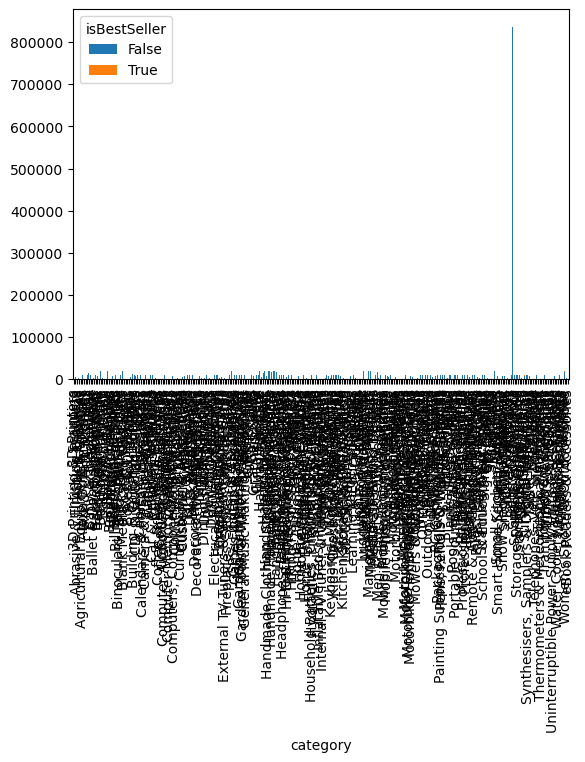

In [14]:
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstab_result.plot(kind="bar", stacked=True);

# Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [17]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers

In [18]:
# Your code goes here
data_series = df['price']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
print(outliers)
df.iloc[~outliers.index,:] # ~ = NOT

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2443640,2828581,B0BX2KM9KQ,Motorcycle Socks 2 Pairs I'd Rather be on My M...,0.0,0,10.99,False,0,Motorbike Clothing
2443631,2828572,B01N1GW57Z,WULFSPORT LINEAR MOTORBIKE KIDS RACE SUIT New ...,5.0,4,60.62,False,0,Motorbike Clothing
2443625,2828566,B095K5HFZ7,SHIMA SX-2 EVO LADY Motorbike Shoes for Women ...,4.6,170,99.95,False,0,Motorbike Clothing
2443622,2828563,6040458925,starlingukpk Quality Flexible Motorbike Motorc...,4.2,2,9.99,False,0,Motorbike Clothing
2443619,2828560,B07JLZB7YY,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing
...,...,...,...,...,...,...,...,...,...
31,32,B08MQRDDYB,"Echo Show 15 | Full HD 15.6"" smart display wit...",4.4,2616,199.99,False,0,Hi-Fi Speakers
23,24,B09HGRXXTM,JBL Flip 6 Portable Bluetooth Speaker with 2-w...,4.7,8700,98.95,False,0,Hi-Fi Speakers
12,13,B09ZXDMNCY,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


In [19]:
df_no_outliers = df.iloc[~outliers.index,:] # ~ = NOT

In [22]:
df_no_outliers.shape

(327688, 9)

# Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.

Which product category tends to have the highest median price? Don't filter here by top categories.

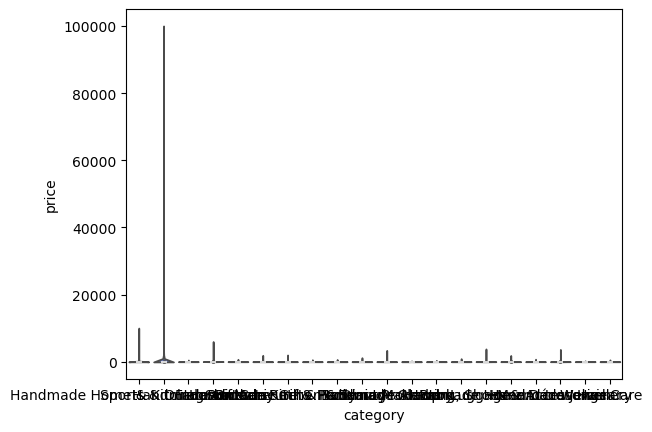

In [24]:
top_20_categories = df['category'].value_counts().head(20).index

df_top20 = df[df['category'].isin(top_20_categories)]

# Plot violin plot
# Plotting a violin plot to visualize the distribution of 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
sns.violinplot(data=df_top20, x='category', y='price', palette="coolwarm", hue='category', legend=False);

In [28]:
# Group by category and calculate median price
median_prices = df.groupby('category')['price'].median()

# Find the category with the highest median price
highest_median_category = median_prices.idxmax()
highest_median_value = median_prices.max()

print(f"Category with highest median price: {highest_median_category} (${highest_median_value:.2f})")
 

Category with highest median price: Laptops ($1042.72)


# Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

Which product category commands the highest average price? Don't filter here by top categories.

In [42]:
top_categories = df['category'].value_counts().head(10).index

filtered_df = df[df['category'].isin(top_categories)]

average_prices = filtered_df.groupby('category')['price'].mean()

In [52]:
top_10 = average_prices.sort_values(ascending = False).head(10)

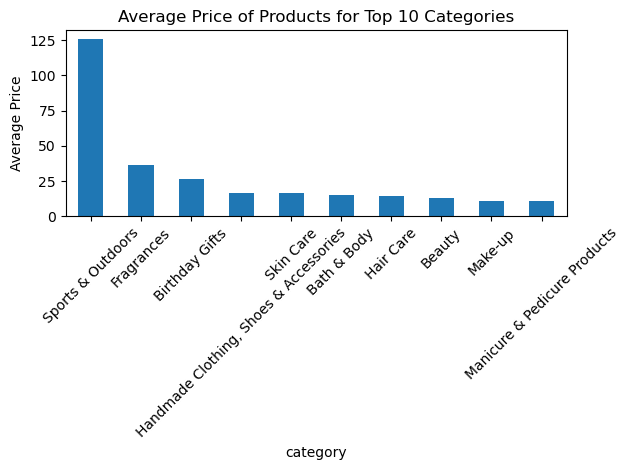

In [61]:
top_10.plot(kind='bar')
plt.ylabel('Average Price')
plt.title('Average Price of Products for Top 10 Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
top_10

category
Sports & Outdoors                         125.769814
Fragrances                                 36.202865
Birthday Gifts                             26.585166
Handmade Clothing, Shoes & Accessories     16.865767
Skin Care                                  16.340926
Bath & Body                                15.042266
Hair Care                                  14.326030
Beauty                                     13.222322
Make-up                                    10.895356
Manicure & Pedicure Products               10.521108
Name: price, dtype: float64

In [63]:
# Compute average price per category
average_prices = df.groupby('category')['price'].mean()

# Get the category with the highest average price
highest_avg_price_category = average_prices.idxmax()
highest_avg_price = average_prices.max()

print(f"The category with the highest average price is '{highest_avg_price_category}' with an average price of {highest_avg_price:.2f}.")


The category with the highest average price is 'Laptops' with an average price of 1087.99.


# Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
                                                                                                                                                   
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [77]:
# Calculate median rating per category
median_ratings = df.groupby('category')['stars'].median().sort_values(ascending=False)

# Show the top category by median rating
highest_median_category = median_ratings.idxmax()
highest_median_value = median_ratings.max()

print(f"Category with highest median rating: {highest_median_category} ({highest_median_value})")


Category with highest median rating: Computer Memory (4.7)


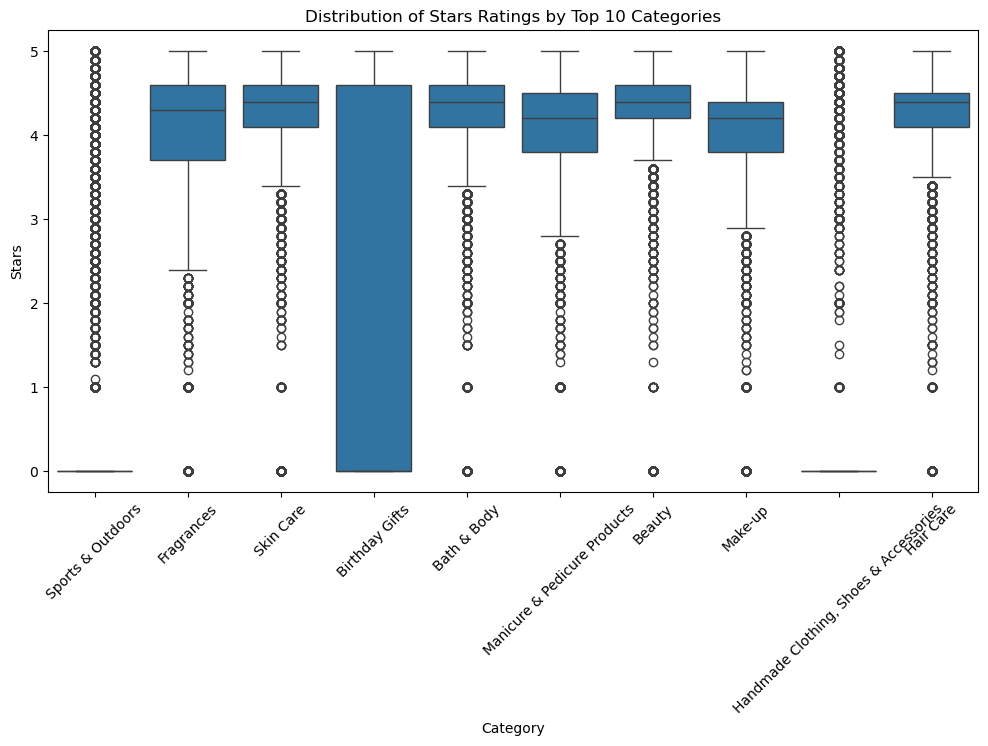

In [83]:
# Get top 10 categories by count
top_categories = df['category'].value_counts().head(10).index

# Filter dataset
top_df = df[df['category'].isin(top_categories)]

# Plot boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_df, x='category', y='stars')
plt.xticks(rotation=45)
plt.title("Distribution of Stars Ratings by Top 10 Categories")
plt.ylabel("Stars")
plt.xlabel("Category")
plt.show()


# Objective: Analyze how product ratings (stars) correlate with product prices.

# Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?

In [86]:
correlation = df[['price', 'stars']].corr(method='pearson')
print(correlation)


          price     stars
price  1.000000 -0.124907
stars -0.124907  1.000000


no the correlation is negative

# Visualizations:

Use a scatter plot to visualize the relationship between product rating and price.

What patterns can you observe?

Use a correlation heatmap to visualize correlations between all numerical variables.

Examine if product prices typically follow a normal distribution using a QQ plot.

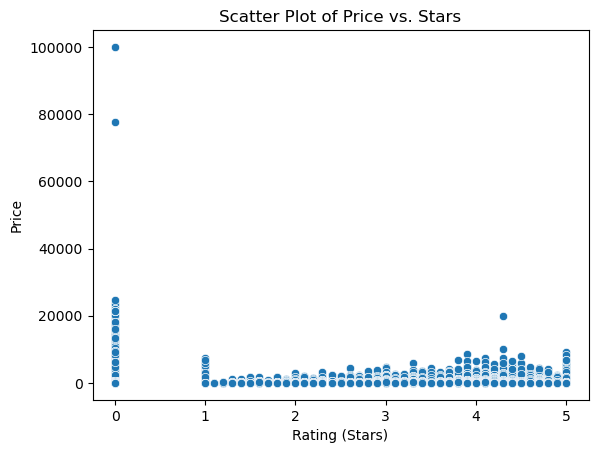

In [97]:
sns.scatterplot(data=df, x='stars', y='price')
plt.title('Scatter Plot of Price vs. Stars')
plt.xlabel('Rating (Stars)')
plt.ylabel('Price')
plt.show()


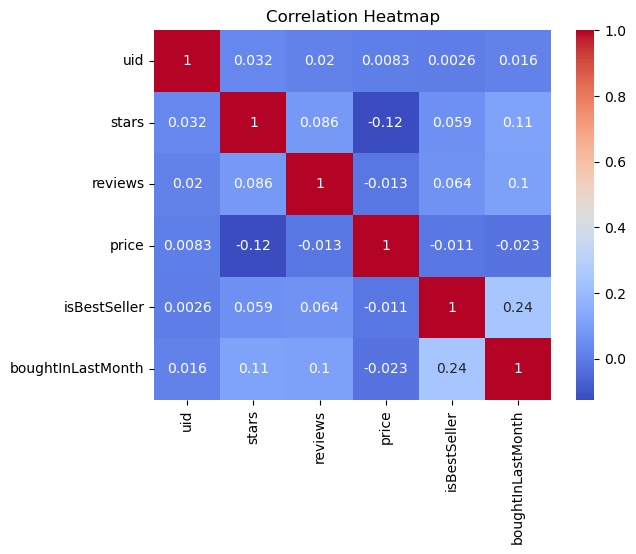

In [103]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


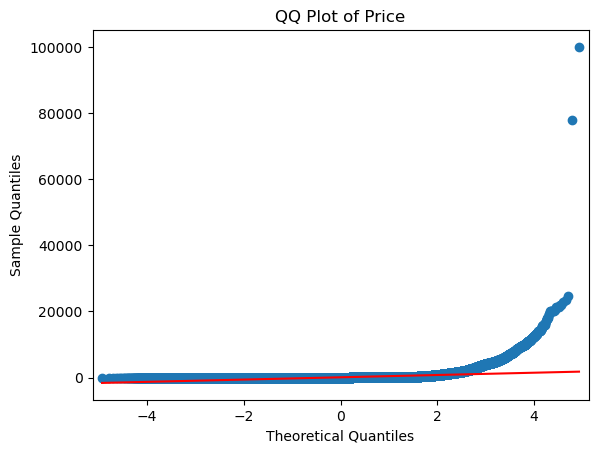

In [101]:
import scipy.stats as stats
import statsmodels.api as sm

sm.qqplot(df['price'].dropna(), line='s')
plt.title('QQ Plot of Price')
plt.show()
